In [1]:
from Grid import *

In [3]:
# (y, x)
start=(4.5,10.5)
target=[15.5,10.5]
# start=(4,10)
# target=[15,10]
u=1
f=1
dims=(20,20)
temp_t = 1000
U=np.zeros((temp_t,dims[0],dims[1]))
V=np.zeros((temp_t,dims[0],dims[1]))
U[:,8:13,:]=u
# U[:,10:20,:]=-u
V[:,:,:]=0
# for i in range(30,60):
#     u[:,i]=i*.01
#v[:,30:59,]=.5
F=np.ones((temp_t,dims[0],dims[1]))*f


In [4]:
# U[0,20,0]

/Users/rohit/workspace/ROHIT/Revanth/project/python/Grid.py:46: UserWarning: No contour levels were found within the data range.
  contours=plt.contour(self._X,self._Y,self._phi,levels=[0])


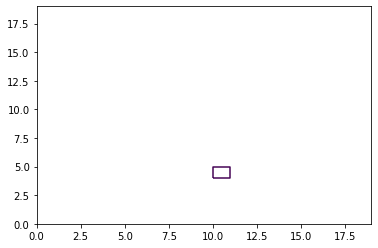

In [5]:
# Q: what are the slices for?
xslice=[slice(35,42)]
yslice=[slice(35,42)]
noentry_slices=[xslice,yslice]
# print(noentry_slices)
# 	def __init__(self,dimensions,start,target,F,u,v,nb_width,dz_per,dX,dt,order=2,advection_term=9,fluxlimiter=0,tol=1e-8,noentry_slices=[[],[]]):
# Q: what is dz_per?
cnts=Grid(dims,start,target,F,U,V,5,.5,(1,1),.1,order=2,advection_term=9)

In [6]:
%matplotlib inline
cnts.main()
# Q: discuss this error. Why are contours not reaching end point?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd1bf0d8d08> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Q: what is this cell for ?
x=list(range(35,42))
y=list(range(35,42))
xy=np.meshgrid(x,y)
x,y=xy[0],xy[1]

In [ ]:
%matplotlib notebook
# Q: what are the arguments ?? -_plot_contours_with_path3(self,heur=1,freq=1)
cnts._plot_contours_with_path3(1)
#plt.plot([20,s2],[20,20],color="k",marker="o",linewidth=2)
plt.scatter(start[1],start[0],color="g",label="start")
plt.scatter(target[1],target[0],color="c",label="target")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.legend()
plt.show()
print(cnts._timestep_count)

In [ ]:
# Q: What is this cell for?
from math import sin,cos,tan,pi,atan
from scipy.optimize import minimize,NonlinearConstraint
X=target[1]-start[1]
y1=19.5
y2=40
y3=0.5
def fn(x):
    x1,x2,x3=x
    return ((y1/cos(x1))+(y2/cos(x2))+(y3/cos(x3)))/f

def constraint(x):
    x1,x2,x3=x
    return X-y1*tan(x1)-y2*(tan(x2)+(u/f)/cos(x2))-(y3*tan(x3))

con=NonlinearConstraint(constraint,0,0)
s=minimize(fn,(0,0,0),constraints=({"type":"eq","fun":constraint}))
print(s)
x=s["x"]
a0=x[0]
a1=atan(tan(x[1])+(u/f)/cos(x[1]))
a2=x[2]

s1=start[0]+y1*tan(x[0])
s2=s1+y2*tan(a1)
s3=s2+y3*tan(a2)
print(s1,s2,s3)

In [ ]:
%matplotlib notebook
#%matplotlib inline

cnts._plot_contours_with_path3(1)
# plt.plot([20,s1,s2,s3],[20,30,58,60],color="b",marker="o",linewidth=1,label="theoretical")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.title("Horizontal flow from 30 to 58")
plt.legend()
plt.show()

In [ ]:
cnts._projected_pts

In [ ]:
cnts._path

In [ ]:
import os
import cv2
li=os.listdir("figures")

In [ ]:
x=sorted([int(l.strip(".png")) for l in li])
d=[str(i)+".png" for i in x]

In [ ]:
img=cv2.imread("figures/1.png")
height,width,channels=img.shape
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))

In [ ]:
for i in d:
    img=cv2.imread("figures/{}".format(i))
    video.write(img)
video.release()